In [1]:
import json
import re
import json
import matplotlib.pyplot as plt
from collections import Counter


In [ ]:

with open('./small_sample_output_dir/split0_output_summary_voted_processed_five_models_gpt-4o_voted_five_models_1.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


In [3]:
data[0]

{'question': '#include<algorithm>\n#include<iostream>\n#include<cstdio>\nusing namespace std;\nint a[5001][5001];\nint main()\n{\n\tint n,m,ans=0;\n\tcin>>n>>m;\n\tchar s[n+1][m+1];\n\tfor(int i=1;i<=n;i++)scanf("%s",&s[i]+1);\n\tfor(int i=1;i<=n;i++)for(int j=2;j<=m;j++)\n\t\tif(s[i][j-1]==\'1\')a[i][j]=(s[i][j]==\'1\')?a[i][j-1]+1:1;\n\tfor(int i=1;i<=m;i++)\n\t{\n\t\tint s[n+1];\n\t\tfor(int j=1;j<=n;j++)s[j]=a[j][i];\n\t\tsort(s+1,s+n+1);\n\t\tfor(int j=1;j<=n;j++)ans=max(ans,s[j]*(n-j+1));\n\t} \n\tcout<<ans<<endl;\n}\n',
 'function_description': {'A': '计算给定矩阵中全1子矩阵的最大面积。',
  'B': '计算二维矩阵中最大全1子矩阵面积。',
  'C': '这段代码计算二维01矩阵中最大的全1矩形面积。',
  'D': '该代码计算二维矩阵中最大子矩形面积。 \n',
  'E': "计算由'1'组成的最大矩形面积，基于输入的01矩阵。\n\nCWE潜在问题: CWE-129: Improper Validation of Array Index"},
 'vulnerability_analysis': {'A': '[\n   {\'CWE_Type\':\'CWE-125\', \'CWE_Code\':\'for(int i=1;i<=n;i++)scanf("%s",&s[i]+1);\', \'CWE_Description\':\'可能导致越界读取，当矩阵行数量超出定义范围时，数组s可能未能正确存储数据，触发未定义行为。\'},\n\n   {\'CWE_Type\':\'CWE-7

In [4]:

# 定义匹配的正则表达式
pattern = re.compile(r'：([A-Za-z, ]+)！')


In [5]:
tmp= pattern.search(data[0]["vulnerability_analysis_voted_answer"])
tmp

<re.Match object; span=(845, 850), match='：A,E！'>

In [6]:

# 遍历每一个元素（假设每个元素是一个字典）
for item in data:
    # 检查是否存在 'vulnerability_analysis_voted_answer' 键
    if 'vulnerability_analysis_voted_answer' in item:
        value = item['vulnerability_analysis_voted_answer']
        match = pattern.search(value)
        if match:
            # 提取出匹配的部分
            letters_part = match.group(1)
            # 去除空格，并通过逗号分隔符分割字符串，然后计数
            letters = [letter.strip() for letter in letters_part.split(',')]
            count = len(letters)
        else:
            # 如果没有匹配，设置计数为0
            count = 0

        # 将计数结果添加到字典中
        item['vulnerability_analysis_count'] = count


In [26]:
data[0]

{'question': '#include<algorithm>\n#include<iostream>\n#include<cstdio>\nusing namespace std;\nint a[5001][5001];\nint main()\n{\n\tint n,m,ans=0;\n\tcin>>n>>m;\n\tchar s[n+1][m+1];\n\tfor(int i=1;i<=n;i++)scanf("%s",&s[i]+1);\n\tfor(int i=1;i<=n;i++)for(int j=2;j<=m;j++)\n\t\tif(s[i][j-1]==\'1\')a[i][j]=(s[i][j]==\'1\')?a[i][j-1]+1:1;\n\tfor(int i=1;i<=m;i++)\n\t{\n\t\tint s[n+1];\n\t\tfor(int j=1;j<=n;j++)s[j]=a[j][i];\n\t\tsort(s+1,s+n+1);\n\t\tfor(int j=1;j<=n;j++)ans=max(ans,s[j]*(n-j+1));\n\t} \n\tcout<<ans<<endl;\n}\n',
 'function_description': {'A': '计算给定矩阵中全1子矩阵的最大面积。',
  'B': '计算二维矩阵中最大全1子矩阵面积。',
  'C': '这段代码计算二维01矩阵中最大的全1矩形面积。',
  'D': '该代码计算二维矩阵中最大子矩形面积。 \n',
  'E': "计算由'1'组成的最大矩形面积，基于输入的01矩阵。\n\nCWE潜在问题: CWE-129: Improper Validation of Array Index"},
 'vulnerability_analysis': {'A': '[\n   {\'CWE_Type\':\'CWE-125\', \'CWE_Code\':\'for(int i=1;i<=n;i++)scanf("%s",&s[i]+1);\', \'CWE_Description\':\'可能导致越界读取，当矩阵行数量超出定义范围时，数组s可能未能正确存储数据，触发未定义行为。\'},\n\n   {\'CWE_Type\':\'CWE-7

In [7]:

# 将修改后的数据写回到一个新的JSON文件中
with open('./modified_data.json', 'w', encoding='utf-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

print("修改后的数据已成功写入 modified_data.json")

修改后的数据已成功写入 modified_data.json


In [8]:


# 提取 vulnerability_analysis_count 列的数据
count_list = [item['vulnerability_analysis_count'] for item in data if 'vulnerability_analysis_count' in item]
count_list[:5]


[2, 3, 2, 1, 2]

In [9]:

# 使用 Counter 计算每个 count 值的频次
count_frequency = Counter(count_list)
count_frequency

Counter({2: 330, 1: 97, 3: 60, 0: 9})

In [10]:
# 筛选出 vulnerability_analysis_count 为 0 的项
zero_count_items = [item for item in data if item.get('vulnerability_analysis_count') == 0]

In [31]:
for idx, item in enumerate(zero_count_items, start=1):
    print(f"Item {idx}: {item}")


Item 1: {'question': '#include <bits/stdc++.h>\n#include <complex>\nusing namespace std;\n#define mp make_pair\n#define pb push_back\n#define all(a) (a).begin(), (a).end()\n//#define len(a) (int)(a.size())\n#define Pi acos(-1.)\n#define x first\n#define y second\n#define X real()\n#define Y imag()\n\n\ntypedef long long ll;\ntypedef ll T;\ntypedef complex<T> Point;\ntypedef pair<ll,ll> pll;\ntypedef pair<int,int> pii;\ntypedef vector<int> vi;\ntypedef unsigned long long ull;\ntypedef long double ld;\nconst int MOD=1e9+7;\nconst ll INF=1e18;\nconst int MAXN=2750131+5;\nconst int MAXM=1e7;\nconst int N = 1e6+10;\nconst double EPS = 1e-9;\n\nll i,j,k;\nll n,m,t;\nint dx[] = {-1, 1, 0, 0};\nint dy[] = {0, 0, -1, 1};\n\nll h[MAXN];\n\nint main()\n{\n    ios_base::sync_with_stdio(false);\n    cin.tie(0); cout.tie(0);\n\n\n    int t;\n    cin>>t;\n\n    while(t--){\n        cin>>n>>m>>k;\n\n        for(int i=1;i<=n;i++){\n            cin>>h[i];\n        }\n\n        for(int i=1;i<=n-1;i++){\n

In [11]:

# 也可以输出一下找到的数量
print(f"Total number of items with vulnerability_analysis_count = 0: {len(zero_count_items)}")

Total number of items with vulnerability_analysis_count = 0: 9


In [16]:

# 准备数据用于绘图
labels = list(count_frequency.values())
sizes = list(count_frequency.values())


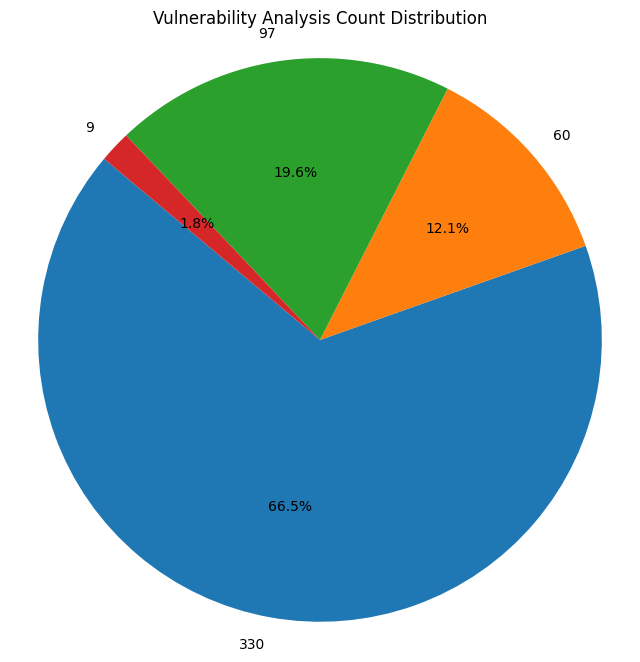

In [17]:
### 每条问题一共淘汰几个
# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# 设置图表标题
plt.title('Vulnerability Analysis Count Distribution')
plt.axis('equal')  # 确保饼图为圆形

# 显示图表
plt.show()

In [35]:
# 筛选出 vulnerability_analysis_count 为 0 的项
three_count_items = [item for item in data if item.get('vulnerability_analysis_count') == 3]

In [37]:
json_3=[]
for idx, item in enumerate(three_count_items, start=1):
    print(f"Item {idx}: {item}")
    json_3.append(item)

# 也可以输出一下找到的数量
print(f"Total number of items with vulnerability_analysis_count = 0: {len(zero_count_items)}")

Item 1: {'question': '#include <bits/stdc++.h>\nusing namespace std;\n#define ll long long\n\nint main(){\n    int t;\n    cin>>t;\n    while(t--){\n        ll x1, y1, x2, y2;\n        cin>>x1>>y1>>x2>>y2;\n        if(x1 == x2 && y1 == y2){\n            cout<<0<<"\\n";\n            continue;\n        }\n        if(x1 == x2 && (y2-y1 == 1)){\n            cout<<1<<"\\n";\n            continue;\n        }\n        if(y1 == y2 && (x2-x1 == 1)){\n            cout<<1<<"\\n";\n            continue;\n        }\n        else if(x1 == x2){\n            cout<<(y2-y1)<<"\\n";\n            continue;\n        }\n        else if(y1 == y2){\n            cout<<(x2-x1)<<"\\n";\n            continue;\n        }\n        else{\n            cout<<abs(x2-x1)+abs(y2-y1)+2<<"\\n";\n        }\n    }\n}', 'function_description': {'A': '计算平面上两点间的特殊路径距离。', 'B': '计算两点之间的移动步数。', 'C': '功能描述：计算网格中两点最短移动距离\n\n安全性分析报告：\n- CWE类型：CWE-190 (整数溢出)\n- 风险等级：低\n- 建议修复：对输入范围进行检查，使用安全的整数类型转换\n\n详细评审结果：\n1. 潜在整数溢出风险\n2. 未进行输入有效性验

In [38]:
keys_to_keep = ['vulnerability_analysis_voted_answer', 'vulnerability_analysis_count']

In [39]:
for item in json_3:
    # 仅保留指定的键和值
    keys_to_delete = set(item.keys()) - set(keys_to_keep)
    for key in keys_to_delete:
        item.pop(key, None)

In [40]:
# 将修改后的数据写回到一个新的JSON文件中
with open('./modified_data_3.json', 'w', encoding='utf-8') as file:
    json.dump(json_3, file, ensure_ascii=False, indent=4)

print("修改后的数据已成功写入 modified_data.json")

修改后的数据已成功写入 modified_data.json
